In [1]:
import numpy as np
import gym

In [2]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", render_mode="human", is_slippery=False)
env.action_space.seed(42)

[42]

# N-steps temporal difference

This method is all about combining monte carlo returns and temporal difference return estimations.

$t$ steps are performed, from $n$ on, action value $t-n$ is updated as follows:

$
\text{starting at state t-n: } Q(s,a) = Q(s,a) + \alpha \cdot (G_{t:t+n} - Q(s,a)) \\
\text{ where }G_{t:t+n} = r_{t+1} + \gamma r_{t+2} + ... + \gamma^{n}Q(s,a)
$

In this case, if n is the total episode steps, we get monte carlo, and if n is 1, we get temporal difference.

The point of this method is to play around with $n$ to find a balance between real rewards $G$ and estimated ones $Q$. The former helps with variability (bouncing around the true value) and the latter helps with bias (precision around a value, not necessarily the true one)

After $t$ steps are performed, the state action value at $t-n$ is updated if $t \geq n$

n-step SARSA ends when $(t-n) = \text{ total steps in route }$ which means that the last value that could be updated was already or whe

In [6]:
def show_optimal_policy(action_values):
    if np.argmax(action_values) == 0:
        return "L"
    elif np.argmax(action_values) == 1:
        return "D"
    elif np.argmax(action_values) == 2:
        return "R"
    else:
        return "U"

action_values = np.zeros((16,4))
action_values

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [7]:
def policy(action_values, state, epsilon):
    if np.random.random() > epsilon:
        print(f"exploting for state {state}...")
        return np.argmax(action_values[state])
    else:
        print(f"exploring for state {state}...")
        return np.random.choice(range(4),p=[0.25]*4)
    
def sarsa_s_steps_on_policy(env, action_values, epsilon=0.99, epsilon_dis = 0.995, gamma=0.7, alpha=0.4, max_episodes=200, max_steps=50, steps = 3):
    i = 0
    j = 0
    delta = []
    for i in range(max_episodes):
        env.reset()
        state = 0
        next_state = 0
        action = policy(action_values, state, epsilon)
        transitions = []
        t = 0
        G = 0
        done = False
        print(f"episode: {i}")
        while t-steps < len(transitions) or t-steps < max_steps: # t - steps > 0 refers to the last updated value in episode. If it's negative, it hasn't updated yet
            if not done: # do not update head after done
                next_state, reward, done, truncated, info = env.step(action)
                next_action = policy(action_values, next_state, epsilon)
                if not done and next_state == state:
                    reward = -10
                elif not done:
                    reward = -1
                elif done and reward == 0:
                    reward = -20
                elif done:
                    reward = 100
                transitions.append([state, action, reward])
            
            if t >= steps: # if it's collected enough value to update
                for (i, (state, action, reward)) in enumerate(reversed(transitions[t-steps:])):
                    if i == 0:
                        G = reward + gamma * action_values[next_state][next_action] * (1-done) # head last action
                    else:
                        G = reward + gamma * G

                temp_dif = alpha * (G - action_values[state][action])
                action_values[state][action] = action_values[state][action] + temp_dif
                delta.append(temp_dif)
            
            # update head
            state = next_state
            action = next_action
            t += 1 # count first tail and, from that moment on, updated values in episode
            if t == max_steps:
                done = True

        epsilon *= epsilon_dis
        print("new epsilon", epsilon)
    return delta

deltas = sarsa_s_steps_on_policy(env, action_values)

exploring for state 0...
episode: 0
exploring for state 0...
exploring for state 0...
exploring for state 0...
exploring for state 0...
exploring for state 4...
exploring for state 0...
exploring for state 0...
exploring for state 0...
exploring for state 0...
exploring for state 1...
exploring for state 0...
exploring for state 0...
exploring for state 0...
exploring for state 1...
exploring for state 1...
exploring for state 2...
exploring for state 3...
exploring for state 2...
exploring for state 3...
exploring for state 3...
exploring for state 2...
exploring for state 6...
exploring for state 5...
new epsilon 0.98505
exploring for state 0...
episode: 1
exploring for state 0...
exploring for state 4...
exploring for state 0...
exploring for state 0...
exploring for state 0...
exploring for state 4...
exploring for state 0...
exploring for state 0...
exploring for state 0...
exploring for state 1...
exploring for state 0...
exploring for state 0...
exploring for state 0...
explotin

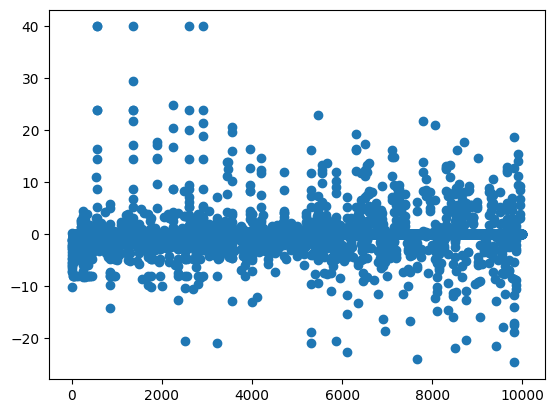

In [9]:
import matplotlib.pyplot as plt

plt.scatter(range(len(deltas)),deltas)